Sample with (width, height): (25, 32) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pichu
Sample with (width, height): (22, 34) classified as Pikachu
Sample with (width, height): (20.5, 34) classified as Pichu


Sample with (width, height): (35.0, 55.0) classified as Pikachu


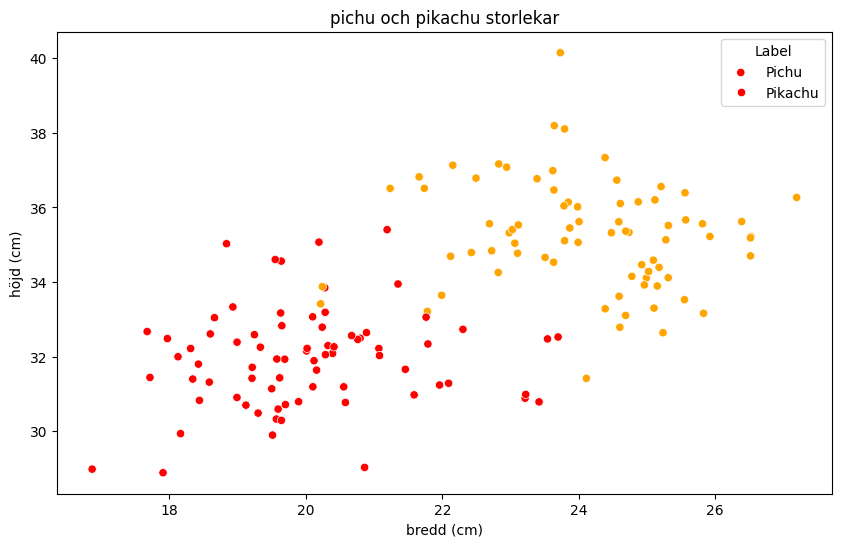

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Dataset med höjd, bredd och lables

 
file_path_height_width_lable= '../Data/datapoints.txt'
data_height_width_lable = pd.read_csv(file_path_height_width_lable)

data_height_width_lable.columns = ['width_cm', 'height_cm', 'label']

# Beräkna euklidiskt avstånd mellan två punkter.
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

#k-nearest neighbors klassificering. chatGpt hjälpte mig skapa denna.
def knn(training_data, new_point, k=10):
    distances_to_neighbors = [(euclidean_distance(new_point, (point['width_cm'], point['height_cm'])), point['label']) for index, point in training_data.iterrows()]
    distances_to_neighbors.sort(key=lambda x: x[0])
    
    top_k_labels = [label for _, label in distances_to_neighbors[:k]]
    most_common = max(set(top_k_labels), key=top_k_labels.count)

    return most_common

# Visa klassificeringsresultatet.
def display_classification(point, classification):
    if classification == 0:
        print(f"Sample with (width, height): {point} classified as Pichu")
    else:
        print(f"Sample with (width, height): {point} classified as Pikachu")

# Få användarinput för en ny datapunkt och klassificera den.
def classify_user_input():
    while True:
        try:
            # Användaren matar in värdena för bredd och höjd.
            width = float(input("Ange bredd: "))
            height = float(input("Ange höjd: "))

            # Felhantering för negativa värden.
            if width < 0 or height < 0:
                raise ValueError("Vänligen ange positiva värden för bredd och höjd.")
                
            # Klassificera den punkt användaren matade in.
            classification = knn(data_height_width_lable, (width, height), k=10)
            display_classification((width, height), classification)
            break

        except ValueError as e:
            print(e)  # Visa användarvänligt felmeddelande.

# Testa KNN-funktionen med testdata.
testdata = [(25,32), (24.2,31.5), (22,34), (20.5,34)]

for point in testdata:
    classification = knn(data_height_width_lable, point)
    display_classification(point, classification)

classify_user_input() 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_height_width_lable, x='width_cm', y='height_cm', hue='label', palette=['red', 'orange'], legend='full')

# Adding labels and title
plt.xlabel('bredd (cm)')
plt.ylabel('höjd (cm)')
plt.title('pichu och pikachu storlekar')
plt.legend(title='Label', labels=['Pichu', 'Pikachu'])

# Show the plot
plt.show()